In [22]:
from Point import Point
from Trips import Trips
from Simulation import Simulation
from Solver import Solver
import time
import matplotlib.pyplot as plt

# Single simulation
## Preparate Data

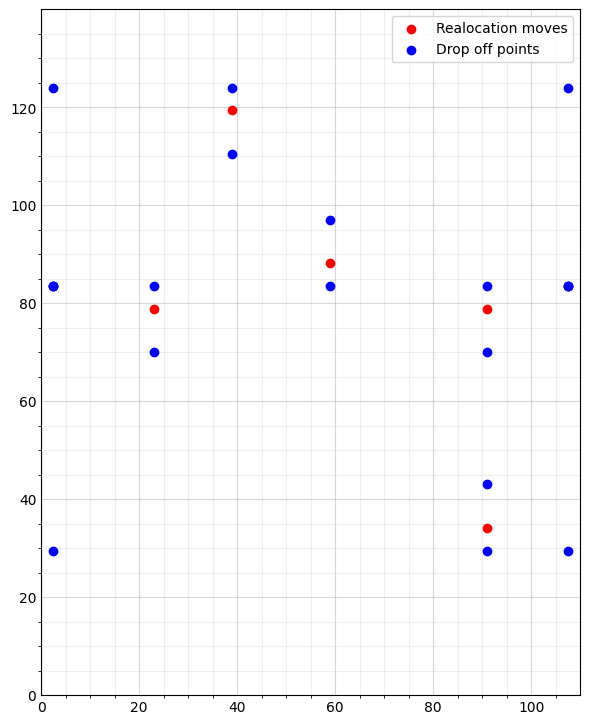

In [23]:
n,m,ks,kr,kn,T_start,c=Simulation.get_simulation_number(0)
J,D=Simulation.initialize_map(n)
Simulation.plot_map(J,D,[],figsize=(5.5,7))


# Solution of problem using Gurobi

In [24]:
start_time = time.time()
trips_problem=Solver.trptr_problem(n,m,J,D,Point(0,0),Point(0,0),time_limit=300)
execution_time_problem=time.time()-start_time

Set parameter TimeLimit to value 300
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 2827 rows, 312 columns and 12122 nonzeros
Model fingerprint: 0x5547eb0f
Variable types: 42 continuous, 270 integer (270 binary)
Coefficient statistics:
  Matrix range     [1e+00, 9e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+02]
Presolve removed 5 rows and 5 columns
Presolve time: 0.01s
Presolved: 2822 rows, 307 columns, 12112 nonzeros
Variable types: 42 continuous, 265 integer (265 binary)
Found heuristic solution: objective 208.3498406

Root relaxation: objective 2.259799e+01, 47 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   22.59799    0   47  208.34984   22.59799  89.2%  

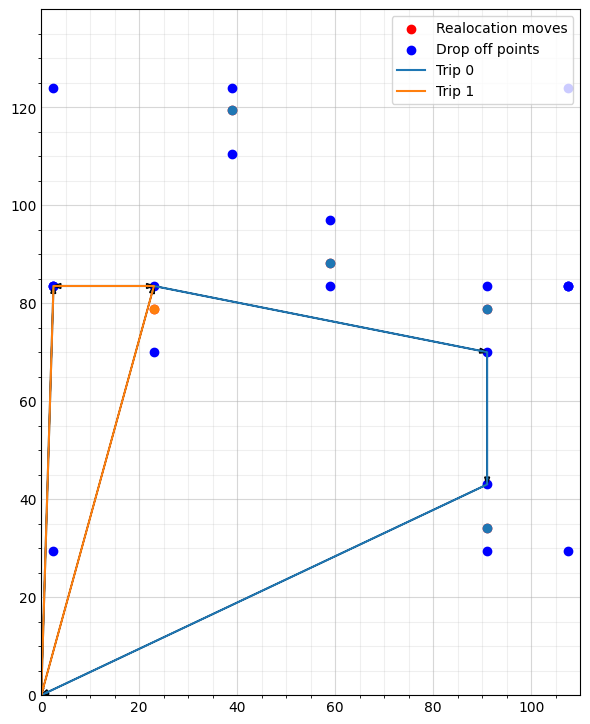

In [25]:
Simulation.plot_map(J,D,trips_problem,figsize=(5.5,7))

# Solution of the problem using the heuristics


In [26]:
start_time = time.time()
trips=Solver.sa_approach(n, m, ks, kr, kn, T_start, c, J, D, Point(0,0), Point(0,0))
execution_sa=time.time()-start_time

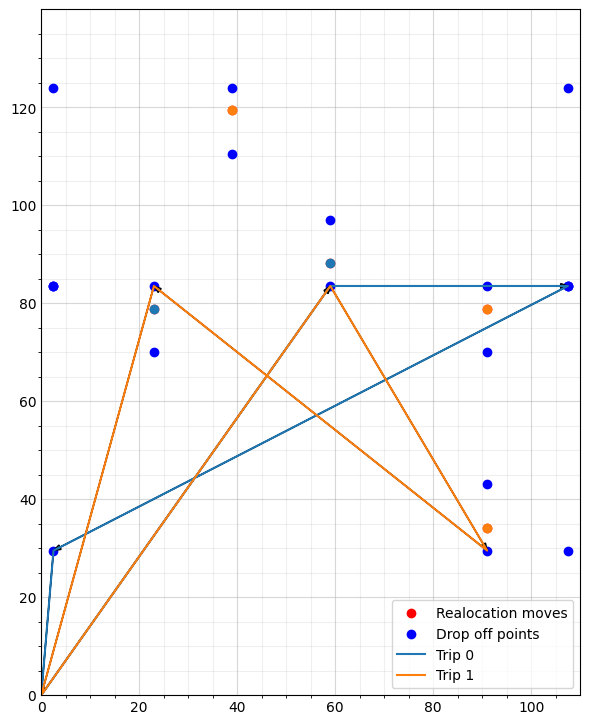

In [27]:
Simulation.plot_map(J,D,trips,figsize=(5.5,7))

### Select-and-assign matheuristic (SAM)

In [28]:
start_time = time.time()
trips_sam=Solver.sam_matheuristic(n, m, J, D, trips,time_limit=60)
execution_sam=time.time()-start_time

Set parameter TimeLimit to value 60
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 17 rows, 14 columns and 36 nonzeros
Model fingerprint: 0x092dc607
Variable types: 2 continuous, 12 integer (12 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [1e+00, 8e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 169.1002098
Presolve removed 17 rows and 14 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 2: 143.333 169.1 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.433333333333e+02, best bound 1.433333333333e+02, gap 0.0000%

Solution
Binary variables: 1, if relocation move j in J is executed on taxi trip i in I;0, otherwis

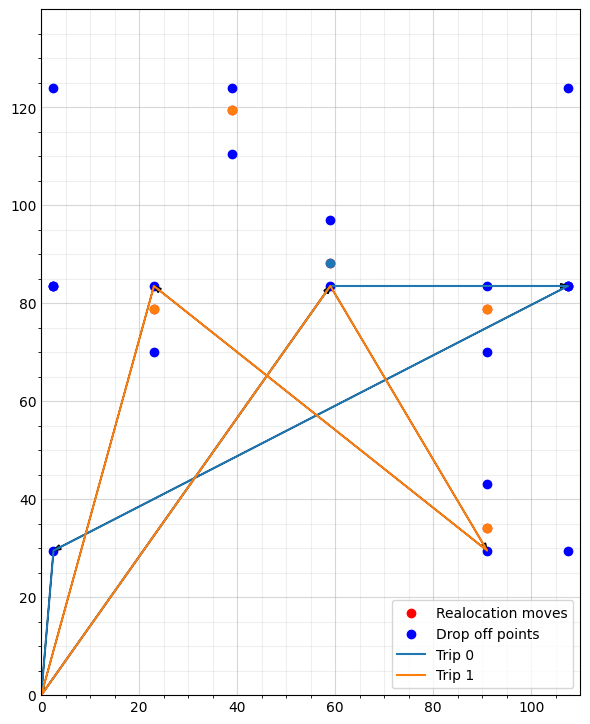

In [29]:
Simulation.plot_map(J,D,trips_sam,figsize=(5.5,7))

#### SAM-Local search

In [30]:
start_time = time.time()
trips_sam_ls=Solver.local_search(n,m,J, D, 100000,trips_sam)
execution_sam_ls=time.time()-start_time

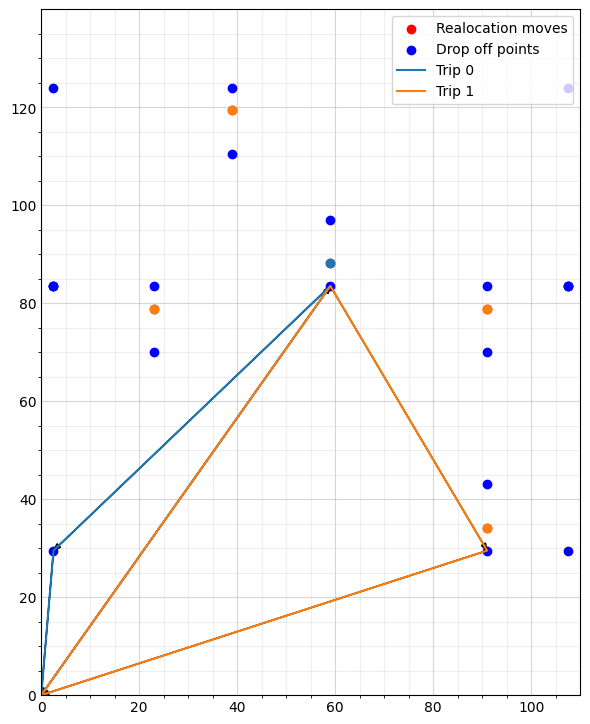

In [31]:
Simulation.plot_map(J,D,trips_sam_ls,figsize=(5.5,7))

### Select matheuristic (SM)

In [32]:
start_time = time.time()
trips_sm=Solver.sm_matheuristic(J,D,trips)
execution_sm=time.time()-start_time

Set parameter TimeLimit to value 60
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 5 rows, 2 columns and 5 nonzeros
Model fingerprint: 0x5a3b2760
Variable types: 0 continuous, 2 integer (2 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e+01, 8e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 149.0079744
Presolve removed 5 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: 149.008 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.490079744435e+02, best bound 1.490079744435e+02, gap 0.0000%


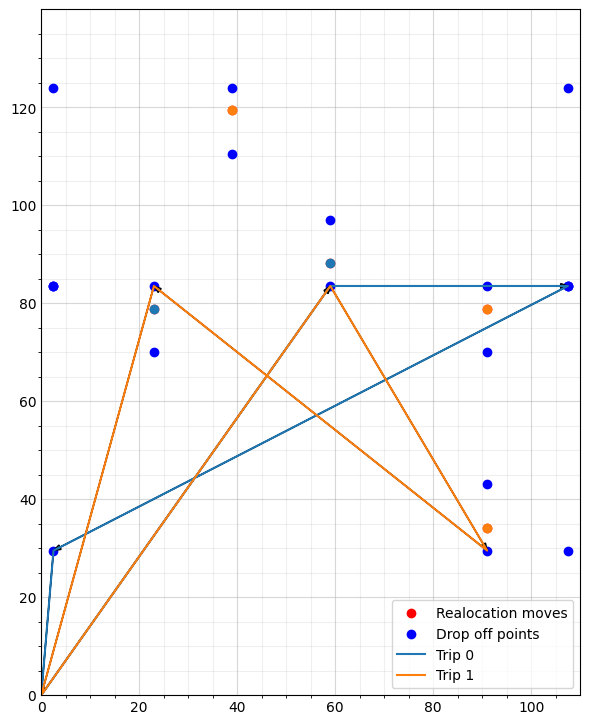

In [33]:
Simulation.plot_map(J,D,trips_sm,figsize=(5.5,7))

#### SM -Local search


In [34]:
start_time = time.time()
trips_sm_ls=Solver.local_search(n,m,J, D, 100000,trips_sm)
execution_sm_ls=time.time()-start_time

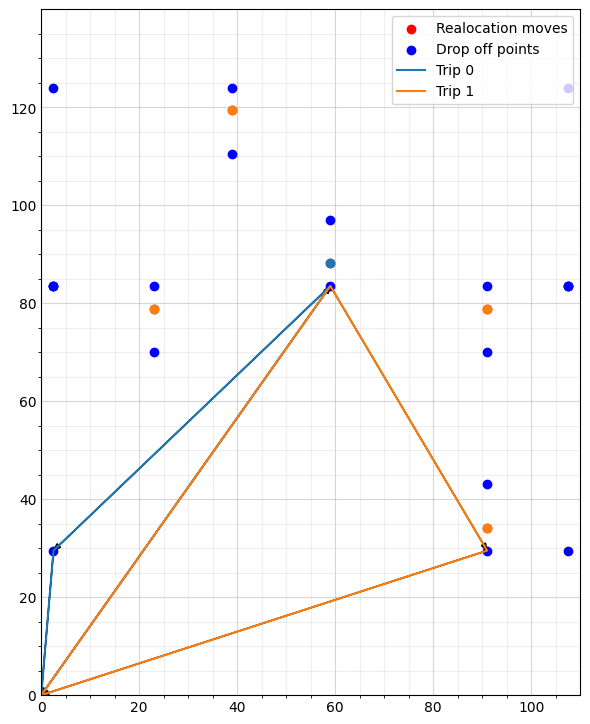

In [35]:
Simulation.plot_map(J,D,trips_sm_ls,figsize=(5.5,7))

## Comparison


### comparison of travel times obtained

In [36]:
travel_time_problem=Trips.get_total_duration(trips_problem)
travel_time_sam=Trips.get_total_duration(trips_sam_ls)
travel_time_sm=Trips.get_total_duration(trips_sm_ls)
print(f"travel time problem ={travel_time_problem}")
print(f"travel time sam ={travel_time_sam}")
print(f"travel time sm ={travel_time_sm}")

travel time problem =110.46222127309943
travel time sam =131.29313844005526
travel time sm =131.29313844005526


### Graphical comparison

### Travel map of problem solved with gurobi

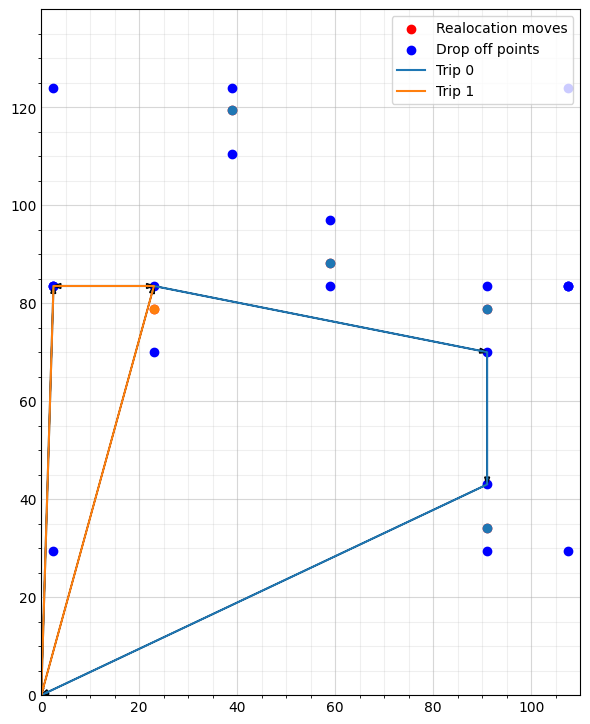

In [37]:
Simulation.plot_map(J,D,trips_problem,figsize=(5.5,7))

### Travel map of problem solved with SAM

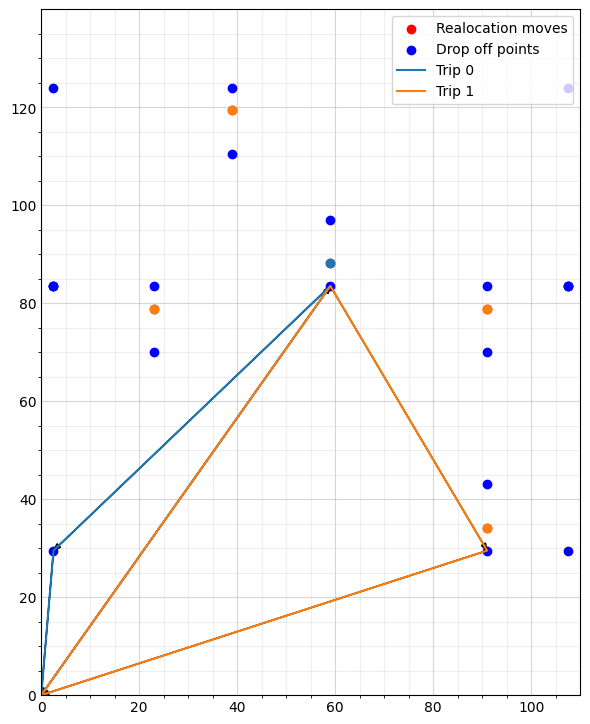

In [38]:
Simulation.plot_map(J,D,trips_sam_ls,figsize=(5.5,7))

### Travel map of problem solved with SM

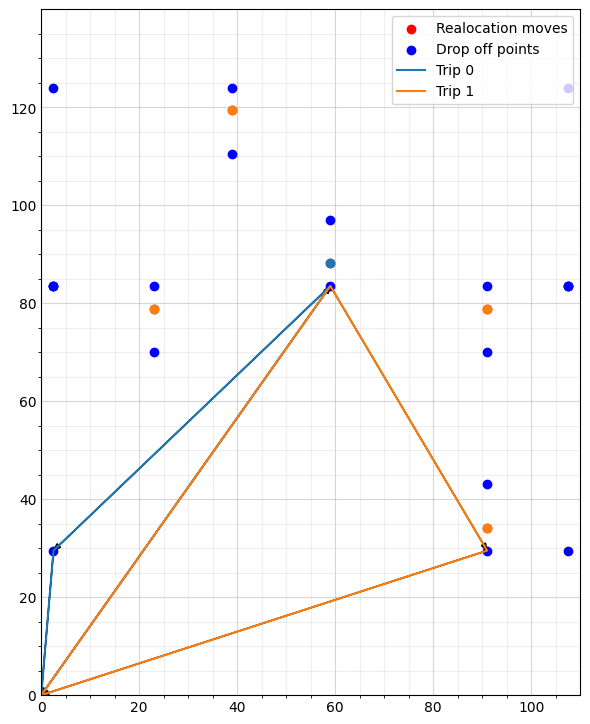

In [39]:
Simulation.plot_map(J,D,trips_sm_ls,figsize=(5.5,7))

### Running time comparison


In [40]:
total_time_sam=execution_sa+execution_sam+execution_sam_ls
total_time_sm=execution_sa+execution_sm+execution_sm_ls
print(f'running time problem solved with Gurobi ={execution_time_problem}')
print(f'running time problem using SMA heuristic ={total_time_sam}')
print(f'running time problem using SM heuristic ={total_time_sm} \n')

print("Time spent by heuristics SMA in phases:")
print(f"tima SA={execution_sa} in percentage {execution_sa/total_time_sam*100}%")
print(f"tima SAM-MIP={execution_sam} in percentage {execution_sam/total_time_sam*100}%")
print(f"tima LC={execution_sam_ls} in percentage {execution_sam_ls/total_time_sam*100}%")

print("")
print("Time spent by heuristics SM in phases:")
print(f"tima SA={execution_sa} in percentage {execution_sa/total_time_sm*100}%")
print(f"tima SM-MIP={execution_sm} in percentage {execution_sm/total_time_sm*100}%")
print(f"tima LC={execution_sm_ls} in percentage {execution_sm_ls/total_time_sm*100}%")


running time problem solved with Gurobi =300.3148627281189
running time problem using SMA heuristic =80.51146197319031
running time problem using SM heuristic =83.29073429107666 

Time spent by heuristics SMA in phases:
tima SA=32.82497572898865 in percentage 40.77056225847583%
tima SAM-MIP=0.020043134689331055 in percentage 0.02489475932756663%
tima LC=47.66644310951233 in percentage 59.20454298219661%

Time spent by heuristics SM in phases:
tima SA=32.82497572898865 in percentage 39.410116873594845%
tima SM-MIP=0.02360081672668457 in percentage 0.028335464835988415%
tima LC=50.44215774536133 in percentage 60.56154766156917%


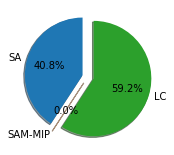

In [41]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'SA', 'SAM-MIP', 'LC'
sizes = [execution_sa/total_time_sam*100, execution_sam/total_time_sam*100, execution_sam_ls/total_time_sam*100]
explode = (0.1, 0.1, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


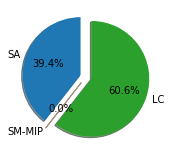

In [42]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'SA', 'SM-MIP', 'LC'
sizes = [execution_sa/total_time_sm*100, execution_sm/total_time_sm*100, execution_sm_ls/total_time_sm*100]
explode = (0.1, 0.1, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
